In [1]:
# 차원 선택(feature selection): 차원 하나를 선택
# 차원 축소(feature reduction) ->주성분 분석(PCA) : 두 차원을 새로운 축(주성분:Principal component) 하나로 정사영시킴. 데이터의 분산을 최대한 유지하면서 저차원으로 데이터를 변환

# 분산을 유지하는 이유는 데이터의 고유한 특성을 최대한 유지.

#선형회귀 -> 연속적 값을 예측 y=wx+b

#로지스틱 회귀 -> 분류문제에 선형회귀를 활용 : sigmoid func= 1/1+e**-(wx+b) 0~1사이로 예측 확률에 따라 가능성이 더 높은 범주에 속하는것으로 분류하는 이진 분류
#선형 회귀의 결과를 시그모이드 함수의 입력값으로 받아 0.5보다 낮은것과 높은것을 범주로 예측
#y=sigmoid(wx+b)

#선형회귀의 비용함수(cost(=MSE 평균제곱오차) function) 를 활용하여 w 값을 알아냄
#로지스틱 회귀에서 선형회귀의 비용함수 활용시 로컬미니멈에 빠질 수 있기때문에 새로운 cost함수가 필요 -> log함수 활용

In [2]:
# multinomial Classfication : 다중분류-> y값이 여러개 a,b,c,d...
# multivariable-> 입력 x값이 여러개

# 로지스틱 회귀 여러개를 활용해서 softmax function 에 넣으면 각각의 분류의 확률이 나옴 제일높은 값으로 분류.

In [3]:
# 앙상블 기법 : 랜덤 포레스트 ->약한모델 여러개를 조합하여 사용 (의사결정트리)
# 배깅 (Bagging) : 샘플을 여러번 추출 -모델을 학습- 결과물을 집계 -> 부트스트랩(=샘플을 여러번 추출) 과 어그리게이팅(aggregating)을 합친단어

# 부스팅(boosting) : 이전 분류기의 학습결과를 바탕으로 다음분류기의 학습데이터의 샘플 가중치를 조정하여 학습하는 방법 
# 배깅 : 병렬적 학습 
# 부스팅: 순차적학습

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("../../data/data/snsdata.csv")
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [59]:
data.age=data.age.fillna(data.groupby('gradyear').age.transform('mean'))


In [60]:
data.describe(include="object")

,gender
count,27276
unique,2
top,F
freq,22054


In [61]:
data.isnull().sum()

gradyear           0
gender          2724
age                0
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [62]:
data['gender'].value_counts(dropna = False) # dropna= False로 두면 nan 도 빈도수로 조사 가능

gender
F      22054
M       5222
NaN     2724
Name: count, dtype: int64

In [63]:
data['gender'].fillna('not disclosed', inplace = True)

In [64]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

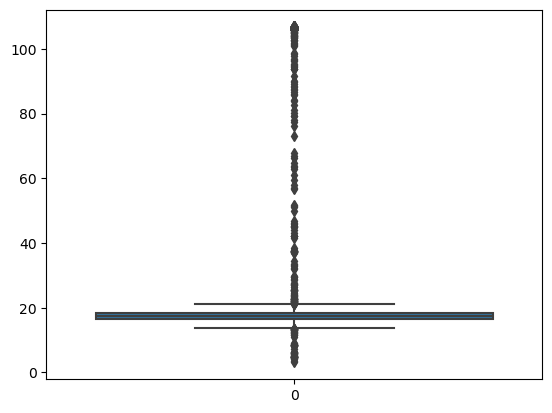

In [65]:
sns.boxplot(data['age'])
plt.show()

In [66]:
q1 = data['age'].quantile(0.25) #1사분위수
q3 = data['age'].quantile(0.75) # 3사분위수
iqr = q3-q1
iqr

1.8874592240696728

In [67]:
q1-(iqr*1.5)

13.672811163895492

In [68]:
q3+(iqr*1.5)

21.222648060174183

In [69]:
data[(data.age<q1-(iqr*1.5))|(data.age>q3+(iqr*1.5))] #이상치

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
34,2006,F,8.383,0,0,0,0,1,0,0,...,0,1,0,0,0,0,2,0,0,0
70,2006,not disclosed,106.686,24,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
78,2006,F,84.159,45,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,2006,F,33.593,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,2006,F,86.136,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29809,2009,F,106.130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29850,2009,F,37.136,69,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29922,2009,F,106.864,44,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29940,2009,F,33.194,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df=data[(data.age>=q1-(iqr*1.5))&(data.age<=q3+(iqr*1.5))] #정상치
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df.age.describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

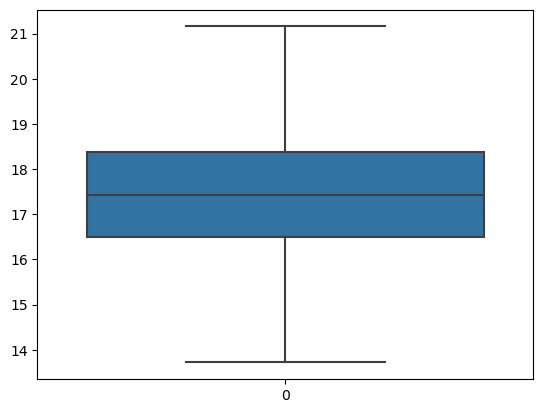

In [72]:
sns.boxplot(df["age"])
plt.show()

In [73]:
scaled_feature = data.copy()

In [74]:
names=df.columns[4:40]
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [75]:
features=scaled_feature[names]
features

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)


In [78]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


In [81]:
def gender_to_numeric(x):
    if x=="M":
        return 1
    if x=="F":
        return 2
    if x== 'not disclosed':
        return 3
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    1
1    2
2    1
3    2
4    3
Name: gender, dtype: int64

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [83]:
model=kmeans.fit(scaled_feature)

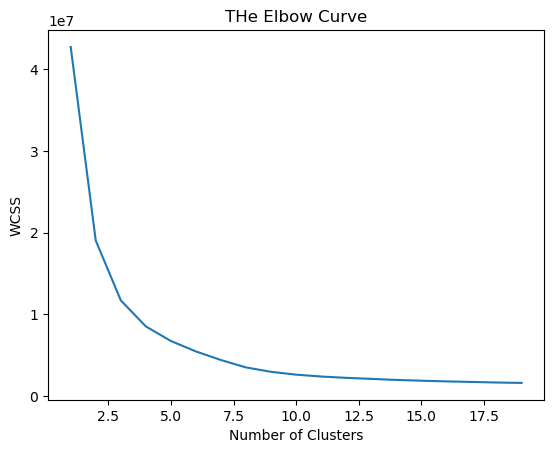

In [85]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_) # 중심과 데이터들과의 거리의 합
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()
#cluster 갯수가 5정도가 적당해보임

In [128]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [129]:
data["cluster"]=kmeans.labels_

In [130]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [90]:
data.cluster.value_counts()

cluster
0    14916
4     9363
1     4366
3     1209
2      146
Name: count, dtype: int64

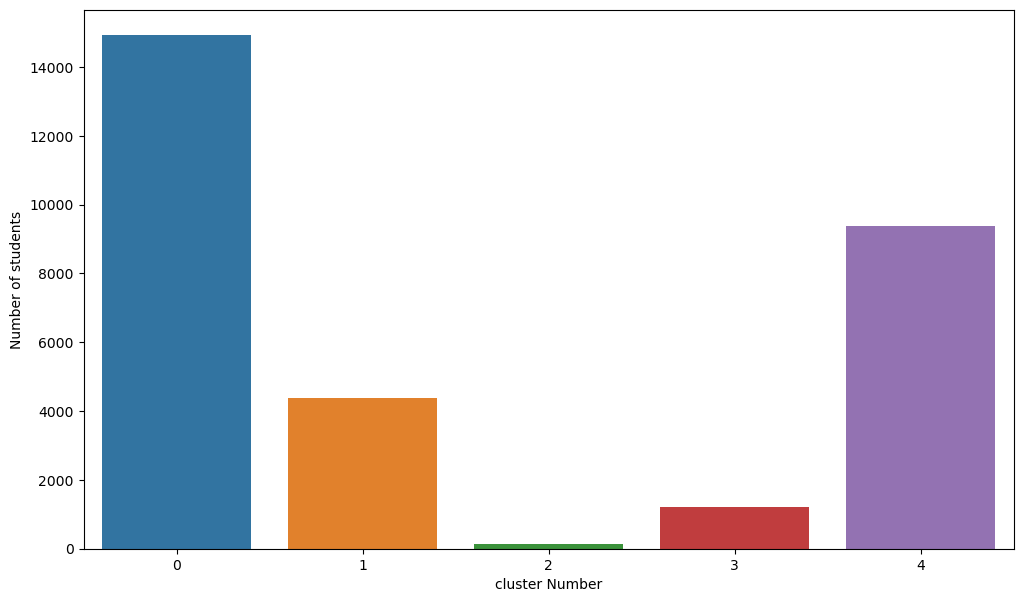

In [91]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1), y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

In [93]:
data.groupby(['cluster']).count()['age']

cluster
0    14916
1     4366
2      146
3     1209
4     9363
Name: age, dtype: int64

In [94]:
data.groupby(['cluster']).count()['age'].values

array([14916,  4366,   146,  1209,  9363], dtype=int64)

In [95]:
kmeans.cluster_centers_ # 5*40, 각각의 클러스터에 대한 중심점의 좌표 

array([[ 2.00743799e+03,  1.91143738e+00,  1.80964840e+01,
         5.76676053e+00, -5.46991461e-02, -3.33912497e-02,
        -3.35343816e-02, -5.42412647e-02, -5.26940783e-02,
        -3.57540867e-02, -4.00881737e-02, -2.72664282e-02,
        -1.27954621e-02, -2.64345444e-02, -6.13149266e-02,
        -2.82913719e-03, -2.73066403e-02, -3.76903250e-02,
        -1.49175800e-02, -5.27538012e-02, -2.56978472e-02,
        -1.97538955e-02, -4.49958682e-02, -3.06712153e-02,
        -4.18969492e-02, -5.67238759e-02, -3.31449389e-02,
        -1.28448251e-02, -2.50966503e-02, -3.25461117e-02,
        -9.58503786e-03, -5.43356124e-02, -7.64794936e-02,
        -2.87989124e-02, -4.33315096e-02, -4.05781654e-02,
        -8.37730047e-03, -2.91481897e-02, -9.76119832e-03,
         1.05897240e-02],
       [ 2.00762254e+03,  1.95235914e+00,  1.78828608e+01,
         7.07171324e+01,  7.82236186e-02,  4.62596362e-02,
         5.35394050e-02,  9.97678280e-02,  5.51478259e-02,
         3.90802233e-02,  6.38

In [99]:
scaled_feature['basketball'].std()

1.000016667083496

In [100]:
scaled_feature['basketball'].mean() #0 e-17승

5.4948638232114415e-17

In [101]:
from sklearn.cluster import DBSCAN

In [115]:
model=DBSCAN()

In [116]:
model.fit(scaled_feature)

DBSCAN()

In [120]:
scaled_feature['DBcluster']=model.labels_

In [121]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,DBcluster
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908,-1
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,1,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,60
29996,2009,1,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1
29997,2009,1,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1
29998,2009,1,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1


In [122]:
scaled_feature['DBcluster'].value_counts()

DBcluster
-1     28585
 0       173
 2       112
 33       90
 31       88
       ...  
 56        5
 30        5
 28        5
 46        5
 74        5
Name: count, Length: 76, dtype: int64

In [127]:
scaled_feature.groupby('DBcluster').gender.value_counts()

DBcluster  gender
-1         2         21266
           1          5015
           3          2304
 0         3           173
 1         2             6
                     ...  
 70        3             7
 71        2             5
 72        2             5
 73        2             5
 74        2             5
Name: count, Length: 78, dtype: int64

In [132]:
kmeans.fit(scaled_feature)

KMeans(n_clusters=5)

In [134]:
kmeans.predict(scaled_feature)

array([0, 0, 1, ..., 0, 0, 0])

In [135]:
scaled_feature['kmeans']=kmeans.predict(scaled_feature)

In [136]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,DBcluster,kmeans
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1,0
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1,0
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908,-1,1
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1,0
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,1,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,60,4
29996,2009,1,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1,0
29997,2009,1,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1,0
29998,2009,1,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,-1,0


In [138]:
scaled_feature.groupby('kmeans').gender.value_counts()

kmeans  gender
0       2         11443
        1          3115
        3          1461
1       2          2797
        1           452
        3           325
2       2           473
        1            38
        3            35
3       2          6838
        1          1482
        3           666
4       2           503
        3           237
        1           135
Name: count, dtype: int64

In [151]:
scaled_feature.groupby('gender').mean()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,DBcluster,kmeans
gender,,,,,,,,,,,,,,,,,,,,,
1,2007.373995,18.308609,24.926465,0.059728,0.278144,-0.013840,-0.205501,-0.169506,-0.105508,-0.190572,...,-0.419902,-0.161448,-0.107046,-0.101515,-0.009313,-0.023029,-0.031841,-0.015287,0.390846,1.055917
2,2007.536275,17.853581,31.922327,0.000351,-0.047521,0.009398,0.060558,0.048206,0.032534,0.049397,...,0.116300,0.047583,0.027611,0.028964,0.007178,0.017824,0.015676,0.013412,0.209304,1.191122
3,2007.447871,18.397209,26.139134,-0.117344,-0.148471,-0.049557,-0.096335,-0.065338,-0.061143,-0.034596,...,-0.136616,-0.075742,-0.018332,-0.039893,-0.040260,-0.100160,-0.065877,-0.079283,3.235316,1.226505


In [153]:
scaled_feature.drop('DBcluster',axis=1,inplace=True)

In [155]:
model=model.fit(scaled_feature)

In [162]:
scaled_feature['DBSCAN']=model.fit_predict(scaled_feature)

In [163]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,kmeans,DBSCAN
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,0,-1
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,0,-1
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908,1,-1
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,0,-1
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,1,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,4,60
29996,2009,1,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,0,-1
29997,2009,1,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,0,-1
29998,2009,1,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908,0,-1


In [171]:
scaled_feature.groupby('gender').kmeans.value_counts()

gender  kmeans
1       0          3115
        3          1482
        1           452
        4           135
        2            38
2       0         11443
        3          6838
        1          2797
        4           503
        2           473
3       0          1461
        3           666
        1           325
        4           237
        2            35
Name: count, dtype: int64